In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
%run own_and_modified_functions.ipynb

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
# make basic (0 or 1) dataframe
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListMartinNoLow.csv"
marker_genes = pd.read_csv(path_mg, sep=',', index_col=0)
# print column names
print(marker_genes.columns)
marker_genes_basic = pd.DataFrame()
marker_genes_basic['Hepa'] = marker_genes['Hepatocytes'] + marker_genes['HepatocytesPortal'] + marker_genes['HepatocytesCentral']
marker_genes_basic['LSEC'] = marker_genes['LSEC45'] + marker_genes['LSEC Portal'] + marker_genes['LSEC Central']
marker_genes_basic['Endo vein'] = marker_genes['portal_vein_EC45'] + marker_genes['central_vein_EC45'] 
marker_genes_basic['Chol'] = marker_genes['Cholangiocytes']  
marker_genes_basic['Kupf'] = marker_genes['Kupffer cells']
marker_genes_basic['Stel'] = marker_genes['stellateAll'] + marker_genes['stellate PeriPortal'] + marker_genes['stellate PeriCentral'] 
marker_genes_basic['Fibr'] = marker_genes['FibroblastAll'] + marker_genes['fibroblastPortal'] + marker_genes['FibroblastsCentral'] + marker_genes['capsular_fibroblasts45']
marker_genes_basic['B cell'] = marker_genes['B cells']
marker_genes_basic['Meso'] = marker_genes['Mesothelial cells']  
print(marker_genes_basic.columns)
# if value in marker_genes_basic is > 1, set to 1
marker_genes_basic[marker_genes_basic > 1] = 1
# save to csv
marker_genes_basic.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv")

Index(['portal_vein_EC45', 'LSEC45', 'LSEC Portal', 'LSEC Central',
       'central_vein_EC45', 'stellateAll', 'stellate PeriPortal',
       'stellate PeriCentral', 'FibroblastAll', 'fibroblastPortal',
       'FibroblastsCentral', 'VSMC', 'capsular_fibroblasts45',
       'Mesothelial cells', 'Hepatocytes', 'HepatocytesPortal',
       'HepatocytesCentral', 'Cholangiocytes', 'cDC2s', 'Mig. cDCs',
       'Neutrophils', 'Basophils', 'NK cells', 'ILC1s', 'T cells', 'pDCs',
       'B cells', 'cDC1s', 'Kupffer cells', 'Capsule and Central Vein Mac',
       'Portal LAM macrophages', 'Monocytes', 'LECs'],
      dtype='object')
Index(['Hepa', 'LSEC', 'Endo vein', 'Chol', 'Kupf', 'Stel', 'Fibr', 'B cell',
       'Meso'],
      dtype='object')


In [3]:
marker_genes_basic

,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
Column1,,,,,,,,,
Acta2,0,0,0,0,0,0,1,0,0
Adamtsl2,0,0,0,0,0,1,1,0,0
Adgre1,0,0,0,0,1,0,0,0,0
Adgrg6,0,1,1,0,0,0,0,0,0
Atp6v0d2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
Vwf,0,0,1,0,0,0,0,0,0
Wnt2,0,1,1,0,0,0,0,0,0
Wnt9b,0,1,1,0,0,0,0,0,0


Hepa         10
LSEC         11
Endo vein     9
Chol          7
Kupf         16
Stel         16
Fibr         21
B cell        4
Meso          5
dtype: int64


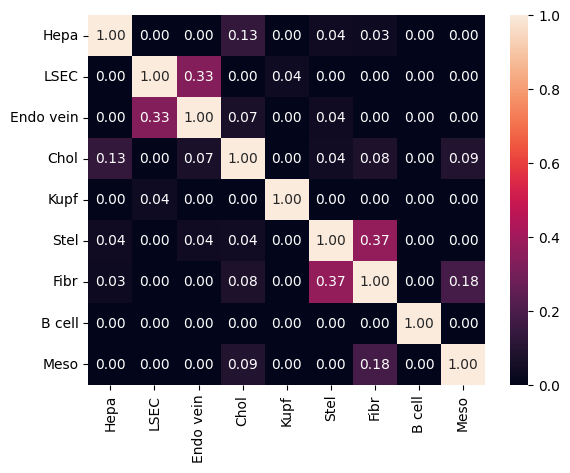

In [4]:
Jaccard_similarity_matrix("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv")

In [5]:
# make high_low (0, 0.5, 1) dataframe
# read in xslx file
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/MarkerGenesResolve_Martin.xlsx"
marker_genes_hl = pd.read_excel(path_mg, sheet_name='markerGenesResolveMC Martin', index_col=0)

In [6]:
marker_genes_hl
marker_genes_hl = marker_genes_hl.fillna(0)
marker_genes_hl = marker_genes_hl.replace('Hi', 1)
marker_genes_hl = marker_genes_hl.replace('HI', 1)
marker_genes_hl = marker_genes_hl.replace('Zonated', 0.5)
marker_genes_hl = marker_genes_hl.replace('zonated', 0.5)
marker_genes_hl = marker_genes_hl.replace('Low', 0.5)
marker_genes_hl = marker_genes_hl.replace('low', 0.5)
marker_genes_hl = marker_genes_hl.replace('Mid', 0.5)
marker_genes_hl = marker_genes_hl.replace('O', 0)
# count occurence of each unique value
unique_values_count = marker_genes_hl.stack().value_counts()
unique_values_count

0.0    2896
1.0     261
0.5     141
dtype: int64

In [7]:
print(marker_genes_hl.columns)
marker_genes_HL = pd.DataFrame()
marker_genes_HL['Hepa'] = (marker_genes_hl['Hepatocytes'] + marker_genes_hl['HepatocytesPortal'] + marker_genes_hl['HepatocytesCentral'])/3
marker_genes_HL['LSEC'] = (marker_genes_hl['LSEC45'] + marker_genes_hl['LSEC Portal'] + marker_genes_hl['LSEC Central'])/3
marker_genes_HL['Endo vein'] = (marker_genes_hl['portal_vein_EC45'] + marker_genes_hl['central_vein_EC45'])/2 
marker_genes_HL['Chol'] = marker_genes_hl['Cholangiocytes']  
marker_genes_HL['Kupf'] = marker_genes_hl['Kupffer cells']
marker_genes_HL['Stel'] = (marker_genes_hl['stellateAll'] + marker_genes_hl['stellate PeriPortal'] + marker_genes_hl['stellate PeriCentral'])/3 
marker_genes_HL['Fibr'] = (marker_genes_hl['FibroblastAll'] + marker_genes_hl['fibroblastPortal'] + marker_genes_hl['FibroblastsCentral'] + marker_genes_hl['capsular_fibroblasts45'])/4
marker_genes_HL['B cell'] = marker_genes_hl['B cells']
marker_genes_HL['Meso'] = marker_genes_hl['Mesothelial cells']  
print(marker_genes_HL.columns)
marker_genes_HL = marker_genes_HL.round(3)
# save to csv
marker_genes_HL.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL.csv")

Index(['portal_vein_EC45', 'LSEC45', 'LSEC Portal', 'LSEC Central',
       'central_vein_EC45', 'stellateAll', 'stellate PeriPortal',
       'stellate PeriCentral', 'FibroblastAll', 'fibroblastPortal',
       'FibroblastsCentral', 'VSMC', 'capsular_fibroblasts45',
       'Mesothelial cells', 'Hepatocytes', 'HepatocytesPortal',
       'HepatocytesCentral', 'Cholangiocytes', 'cDC2s', 'Mig. cDCs', 'Column2',
       'Neutrophils', 'Basophils', 'NK cells', 'ILC1s', 'T cells', 'pDCs',
       'B cells', 'cDC1s', 'Kupffer cells', 'Capsule and Central Vein Mac',
       'Portal LAM macrophages', 'Monocytes', 'LECs'],
      dtype='object')
Index(['Hepa', 'LSEC', 'Endo vein', 'Chol', 'Kupf', 'Stel', 'Fibr', 'B cell',
       'Meso'],
      dtype='object')


In [8]:
# make high_low (0, 0.5, 1) dataframe with 'Endo vein' split and portal LAM macrophages
print(marker_genes_hl.columns)
marker_genes_HL2 = pd.DataFrame()
marker_genes_HL2['Hepa'] = (marker_genes_hl['Hepatocytes'] + marker_genes_hl['HepatocytesPortal'] + marker_genes_hl['HepatocytesCentral'])/3
marker_genes_HL2['LSEC'] = (marker_genes_hl['LSEC45'] + marker_genes_hl['LSEC Portal'] + marker_genes_hl['LSEC Central'])/3
marker_genes_HL2['Portal vein'] = marker_genes_hl['portal_vein_EC45']
marker_genes_HL2['Central vein'] = marker_genes_hl['central_vein_EC45'] 
marker_genes_HL2['Chol'] = marker_genes_hl['Cholangiocytes']  
marker_genes_HL2['Kupf'] = marker_genes_hl['Kupffer cells']
marker_genes_HL2['Stel'] = (marker_genes_hl['stellateAll'] + marker_genes_hl['stellate PeriPortal'] + marker_genes_hl['stellate PeriCentral'])/3 
marker_genes_HL2['Fibr'] = (marker_genes_hl['FibroblastAll'] + marker_genes_hl['fibroblastPortal'] + marker_genes_hl['FibroblastsCentral'] + marker_genes_hl['capsular_fibroblasts45'])/4
marker_genes_HL2['B cell'] = marker_genes_hl['B cells']
marker_genes_HL2['Meso'] = marker_genes_hl['Mesothelial cells']  
marker_genes_HL2['Portal LAM'] = marker_genes_hl['Portal LAM macrophages']
print(marker_genes_HL2.columns)
marker_genes_HL2 = marker_genes_HL2.round(3)


Index(['portal_vein_EC45', 'LSEC45', 'LSEC Portal', 'LSEC Central',
       'central_vein_EC45', 'stellateAll', 'stellate PeriPortal',
       'stellate PeriCentral', 'FibroblastAll', 'fibroblastPortal',
       'FibroblastsCentral', 'VSMC', 'capsular_fibroblasts45',
       'Mesothelial cells', 'Hepatocytes', 'HepatocytesPortal',
       'HepatocytesCentral', 'Cholangiocytes', 'cDC2s', 'Mig. cDCs', 'Column2',
       'Neutrophils', 'Basophils', 'NK cells', 'ILC1s', 'T cells', 'pDCs',
       'B cells', 'cDC1s', 'Kupffer cells', 'Capsule and Central Vein Mac',
       'Portal LAM macrophages', 'Monocytes', 'LECs'],
      dtype='object')
Index(['Hepa', 'LSEC', 'Portal vein', 'Central vein', 'Chol', 'Kupf', 'Stel',
       'Fibr', 'B cell', 'Meso', 'Portal LAM'],
      dtype='object')


In [9]:
marker_genes_HL2

,Hepa,LSEC,Portal vein,Central vein,Chol,Kupf,Stel,Fibr,B cell,Meso,Portal LAM
Column1,,,,,,,,,,,
Acta2,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.250,0.0,0.0,0.0
Adamtsl2,0.0,0.000,0.0,0.0,0.0,0.0,0.5,0.750,0.0,0.0,0.0
Adgre1,0.0,0.000,0.0,0.0,0.0,1.0,0.0,0.000,0.0,0.0,1.0
Adgrg6,0.0,0.500,1.0,0.0,0.5,0.0,0.0,0.125,0.0,0.0,0.0
Atp6v0d2,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
Vwf,0.0,0.000,1.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
Wnt2,0.0,0.500,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
Wnt9b,0.0,0.333,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0


In [10]:
# make basic (0 or 1) dataframe with 'other_immune_cells'
# ['Cd9','Itgb7','Spn','Itgax'] 
# add column to marker_genes_basic
marker_genes_basic_oth_im = marker_genes_basic.copy(deep=True)
marker_genes_basic_oth_im['Oth im'] = 0
marker_genes_basic_oth_im.loc[['Cd9','Itgb7','Spn','Itgax'],'Oth im'] = 1
marker_genes_basic_oth_im.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_othIm.csv")

In [11]:
# make high_low (0, 0.5 or 1) dataframe with 'other_immune_cells'
# ['Cd9','Itgb7','Spn','Itgax'] 
# add column to marker_genes_basic
marker_genes_HL_oth_im = marker_genes_HL.copy(deep=True)
marker_genes_HL_oth_im['Oth im'] = 0
marker_genes_HL_oth_im.loc[['Cd9','Itgb7','Spn','Itgax'],'Oth im'] = 1
marker_genes_HL_oth_im.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm.csv")


In [12]:
# add 'other_immune_cells' to marker_genes_HL2
marker_genes_HL2 = marker_genes_HL2.copy(deep=True)
marker_genes_HL2['Oth im'] = 0
marker_genes_HL2.loc[['Cd9','Itgb7','Spn','Itgax'],'Oth im'] = 1
marker_genes_HL2.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_endoSplit_portalLAM.csv")

In [13]:
marker_genes_HL2

,Hepa,LSEC,Portal vein,Central vein,Chol,Kupf,Stel,Fibr,B cell,Meso,Portal LAM,Oth im
Column1,,,,,,,,,,,,
Acta2,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.250,0.0,0.0,0.0,0
Adamtsl2,0.0,0.000,0.0,0.0,0.0,0.0,0.5,0.750,0.0,0.0,0.0,0
Adgre1,0.0,0.000,0.0,0.0,0.0,1.0,0.0,0.000,0.0,0.0,1.0,0
Adgrg6,0.0,0.500,1.0,0.0,0.5,0.0,0.0,0.125,0.0,0.0,0.0,0
Atp6v0d2,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Vwf,0.0,0.000,1.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0
Wnt2,0.0,0.500,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0
Wnt9b,0.0,0.333,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0


Hepa             8.669
LSEC             9.333
Portal vein      6.000
Central vein     8.500
Chol             7.500
Kupf            19.500
Stel            16.001
Fibr            17.625
B cell           4.500
Meso             6.000
Portal LAM      13.500
Oth im           4.000
dtype: float64


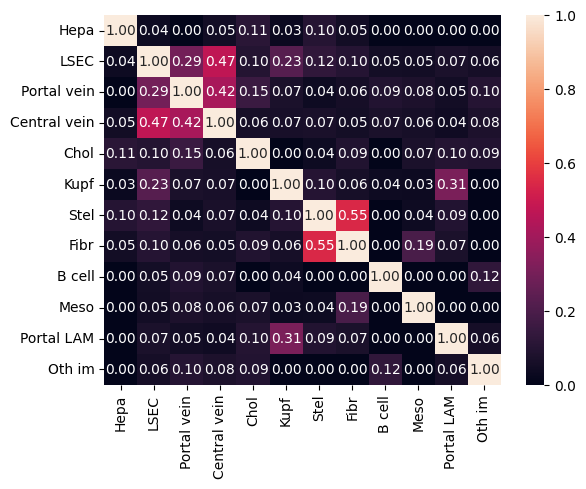

In [14]:
Jaccard_similarity_matrix("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_endoSplit_portalLAM.csv")

/tmp/ipykernel_8295/325566198.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Michiel_subset = df_Michiel_subset.append(pd.DataFrame(0, index=genes_missing_in_Michiel, columns=df_Michiel_subset.columns))


Hepa            10.0
LSEC            20.0
Portal vein     14.0
Central vein    16.0
Chol            14.0
Kupf            25.0
Stel            24.0
Fibr            24.0
B cell          13.0
Meso            14.0
Portal LAM      15.0
Oth im           4.0
dtype: float64


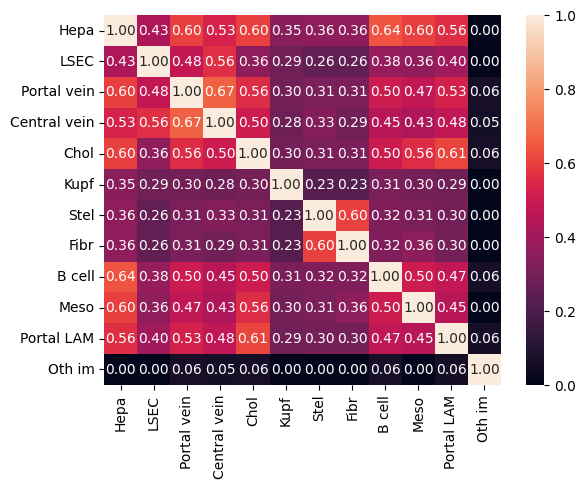

In [15]:
# marker gene list based on updated Sparrow marker panel by Michiel
genes = marker_genes_HL2.index.tolist()
cell_types = marker_genes_HL2.columns.tolist()
mapping_cell_type_names = {}
mapping_cell_type_names['Hepa'] = 'Hepatocyte'
mapping_cell_type_names['LSEC'] = 'LSEC'
mapping_cell_type_names['Portal vein'] = 'PV EC'
mapping_cell_type_names['Central vein'] = 'CV EC'
mapping_cell_type_names['Chol'] = 'Cholangiocyte'
mapping_cell_type_names['Kupf'] = 'KC'
mapping_cell_type_names['Stel'] = 'Stellate cell'
mapping_cell_type_names['Fibr'] = 'Fibroblast'
mapping_cell_type_names['B cell'] = 'B cell'
mapping_cell_type_names['Meso'] = 'Mesothelial cell'
mapping_cell_type_names['Portal LAM'] = 'BD LAM'
path = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/updated_SPArrOW_marker_panel_Michiel.csv"
df_Michiel_raw = pd.read_csv(path, sep=',', index_col=0)
genes_Michiel = df_Michiel_raw.index.tolist()
genes_overlap = list(set(genes) & set(genes_Michiel))
genes_missing_in_Michiel = list(set(genes) - set(genes_overlap))
# take subset of rows in genes
df_Michiel_subset = df_Michiel_raw.loc[genes_overlap,:]
# add column HepatocyteCentral and HepatocytePortal to Hepatocyte column
df_Michiel_subset['Hepatocyte'] = df_Michiel_subset['Hepatocyte'] + df_Michiel_subset['HepatocyteCentral'] + df_Michiel_subset['HepatocytePortal']
# if value in df_Michiel_subset['Hepatocyte'] is > 1, set to 1
df_Michiel_subset[df_Michiel_subset['Hepatocyte'] > 1] = 1
# add rows with 0 values for genes that are missing in Michiel
df_Michiel_subset = df_Michiel_subset.append(pd.DataFrame(0, index=genes_missing_in_Michiel, columns=df_Michiel_subset.columns))
# reorder rows based on genes
df_Michiel_subset = df_Michiel_subset.reindex(genes)
# rename column 
for key in mapping_cell_type_names:
    df_Michiel_subset = df_Michiel_subset.rename(columns={mapping_cell_type_names[key]:key})
df_Michiel_subset['Oth im'] = 0
df_Michiel_subset.loc[['Cd9','Itgb7','Spn','Itgax'],'Oth im'] = 1
df_Michiel_subset = df_Michiel_subset[cell_types]
df_Michiel_subset.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListMichiel_othIm_endoSplit_portalLAM.csv")
Jaccard_similarity_matrix("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListMichiel_othIm_endoSplit_portalLAM.csv")

In [15]:
ad_sc = sc.read('/home/wout/Documents/Thesis_lokaal/Data_to_create_liver_atlas/adataAtlasRESOLVE.h5ad')
ad_sc=ad_sc[ad_sc.obs.typeSample=='nucSeq']


In [16]:
ad_sc

View of AnnData object with n_obs × n_vars = 18666 × 31053
    obs: 'annot', 'typeSample', 'cluster_orig', 'annotation_CD45Neg', 'annotation_Fibro', 'annotation'
    uns: 'annot_colors'
    obsm: 'X_umap'

In [17]:
np.unique(ad_sc.obs['annotation'])

array(['B cells', 'Cholangiocytes', 'Endothelial cells', 'Hepatocytes',
       'HsPCs', 'Kupffer cells', 'LECs', 'LSECs', 'Mesothelial cells',
       'Other_ImmuneCells', 'VSMC', 'central_vein_EC45', 'fibroblast',
       'portal_vein_EC45', 'stellate'], dtype=object)

In [18]:
# substitute values in ad_sc.obs['annot'] 
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['stellate'], 'Stel')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['central_vein_EC45','portal_vein_EC45','Endothelial cells'], 'Endo vein')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['fibroblast'], 'Fibr')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['Mesothelial cells'], 'Meso')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['Cholangiocytes'], 'Chol')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['Hepatocytes'], 'Hepa')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['Kupffer cells'], 'Kupf')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['B cells'], 'B cell')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['LSECs'], 'LSEC')

np.unique(ad_sc.obs['annotation'])

/tmp/ipykernel_17062/3583617197.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['stellate'], 'Stel')


array(['B cell', 'Chol', 'Endo vein', 'Fibr', 'Hepa', 'HsPCs', 'Kupf',
       'LECs', 'LSEC', 'Meso', 'Other_ImmuneCells', 'Stel', 'VSMC'],
      dtype=object)

In [19]:
# calculate proportions of each value in column 'annotation' in ad_sc
ad_sc.obs['annotation'].value_counts(normalize=True)

Hepa                 0.579985
Stel                 0.137683
LSEC                 0.092414
Kupf                 0.032037
Endo vein            0.031662
Fibr                 0.030430
Meso                 0.027965
Chol                 0.026733
HsPCs                0.022126
Other_ImmuneCells    0.008250
B cell               0.006215
VSMC                 0.003268
LECs                 0.001232
Name: annotation, dtype: float64

In [20]:
# to dataframe
df_atlas = pd.DataFrame(ad_sc.obs['annotation'].value_counts(normalize=True))
# only select the rows with index in list
df_atlas = df_atlas.loc[marker_genes_basic.columns]
df_atlas.sort_index(inplace=True)
df_atlas

,annotation
B cell,0.006215
Chol,0.026733
Hepa,0.579985
Kupf,0.032037
LSEC,0.092414
Meso,0.027965
Endo vein,0.031662
Fibr,0.030430
Stel,0.137683


In [21]:
# change name of column 
df_atlas.columns = ['atlas']
# write to csv
df_atlas.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/basic_annotation_percentage_atlas.csv")